In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('./output.xlsx')

In [64]:
import matplotlib.pyplot as plt
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [177]:
%matplotlib inline
plt.style.use('seaborn-white')

df1 = df[['Name','country']]
df1 = df1.groupby('country').count()
df1 = df1.sort_values('Name', ascending=False)
df1['percent'] = df1.Name/100

df1[['percent']][:13].plot(kind='bar',figsize=(17,6), fontsize=20)

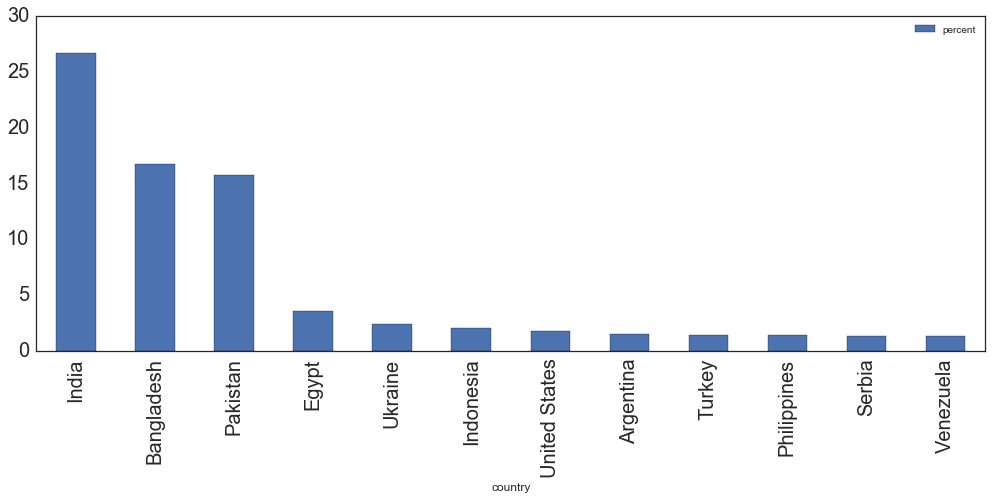

In [186]:
df2 = df1[df1.percent>=1]

remaining = 100-df2.percent.sum()
df2.loc['Other'] = [int(remaining*100), remaining]

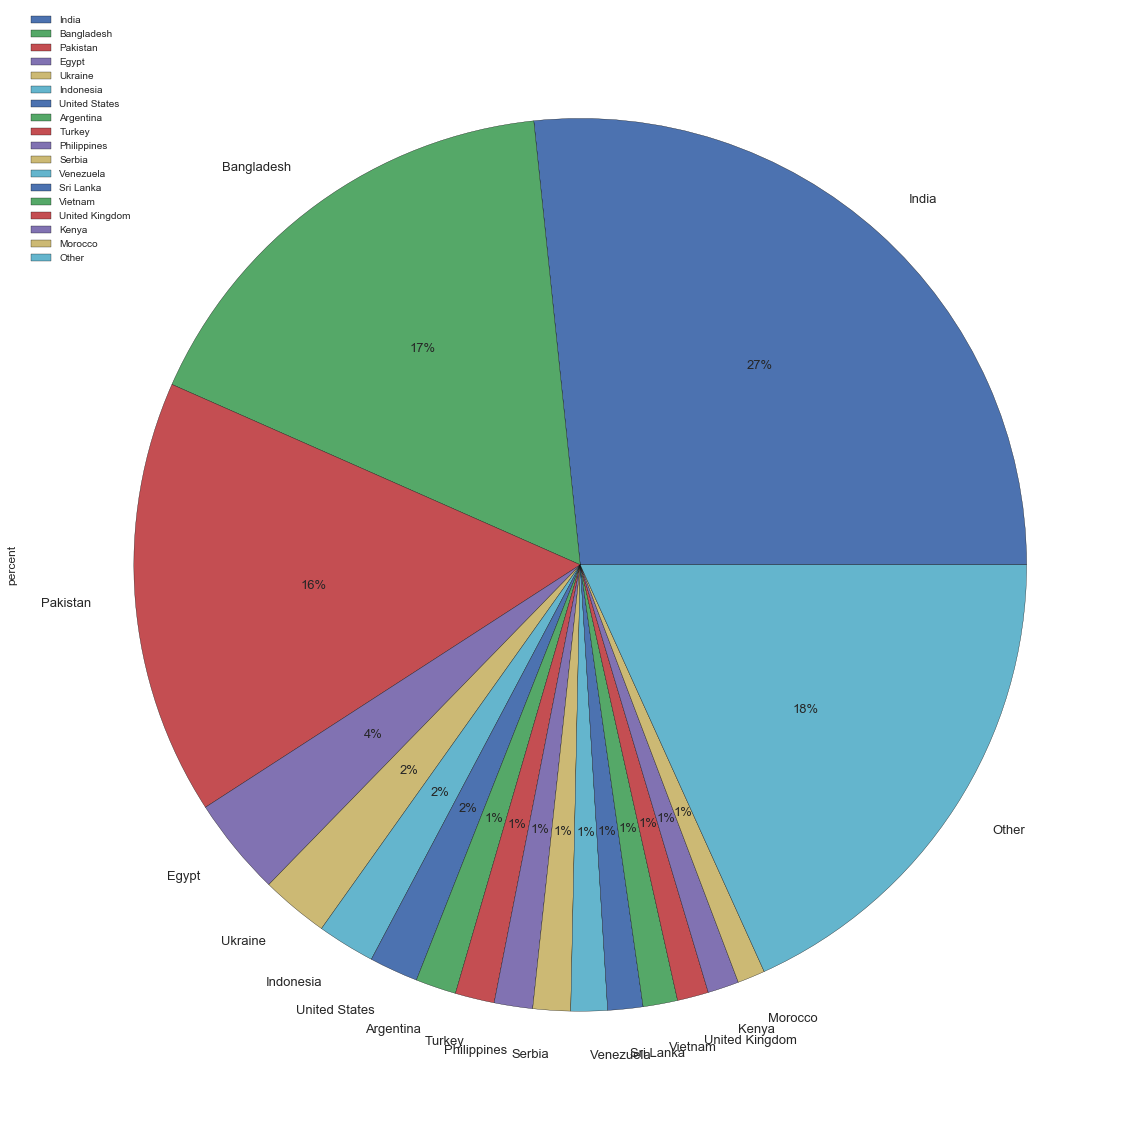

In [218]:
fig = df2[['percent']].plot.pie(y='percent',figsize=(20,20),fontsize=13, autopct='%1.0f%%').get_figure()
fig.savefig('freelancer by country')